In [2]:
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn

In [3]:
df = pd.read_csv("../data/MSFT_historical_data.csv")

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [6]:
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df['SMA50'] = df['Close'].rolling(window=50).mean()

In [7]:
df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

In [8]:
df["MACD"], df["MACD_signal"], _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

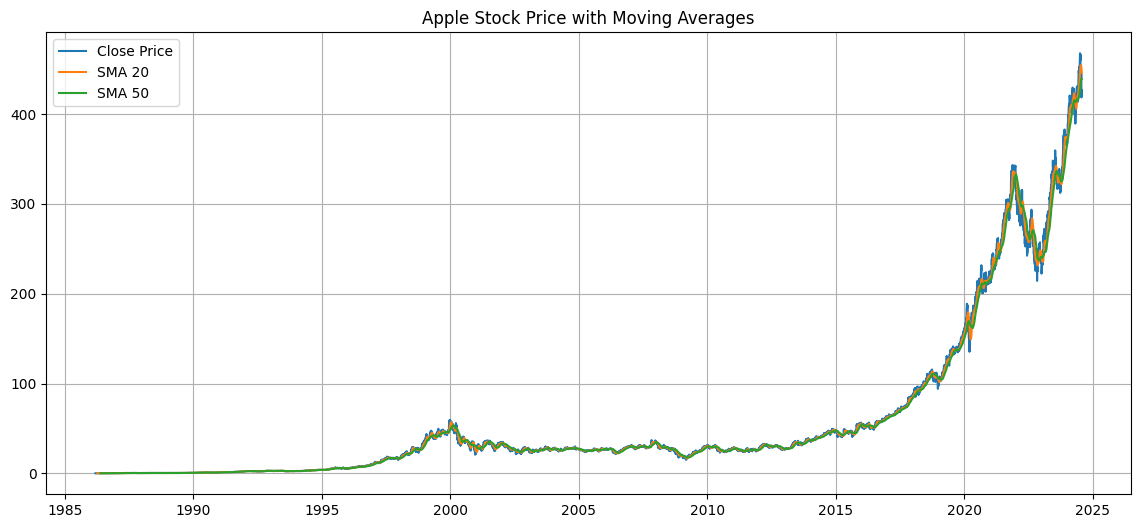

In [9]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA20'], label='SMA 20')
plt.plot(df['SMA50'], label='SMA 50')
plt.legend()
plt.title("Apple Stock Price with Moving Averages")
plt.grid(True)
plt.show()

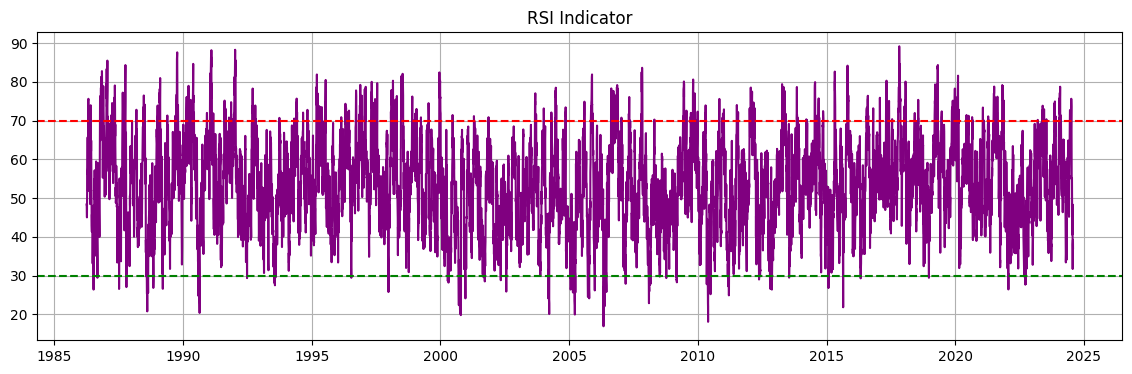

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("RSI Indicator")
plt.grid(True)
plt.show()

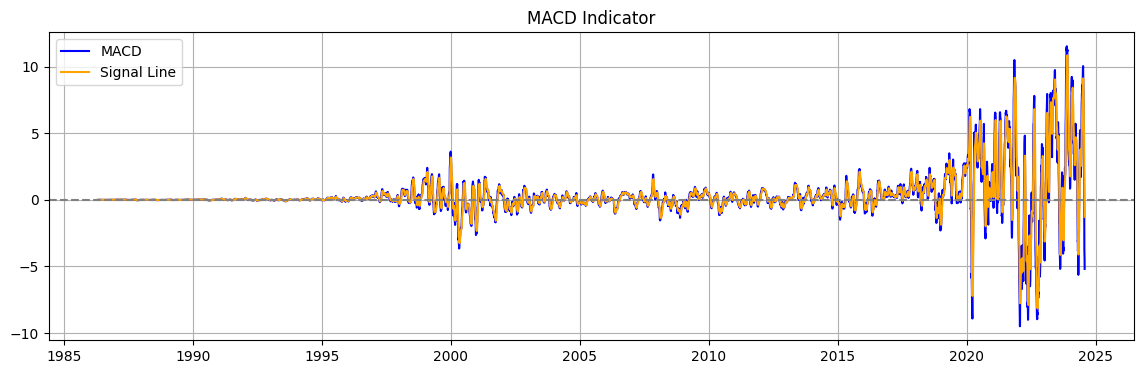

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.title("MACD Indicator")
plt.grid(True)
plt.show()

In [12]:
import os
os.makedirs("data/technical", exist_ok=True)
df.to_csv("data/technical/MSFT_technical.csv", index=False)